---
# <center>
# <center> **Statistics for Machine Learning**
## <center> **Aula 04 - Checkpoint 1**
---

## <center> **Prof. Jones Egydio**

---

# **INSTRUÇÕES**
- Preencha a célula de identificação de forma adequada;
- Leia atentamente as informações e o enunciado dos problemas;
- É permitido a consulta a qualquer material;
- As respostas que contém justificativas serão analisadas por aplicativos que verificam a produção de texto por IA. Portanto, caso resolva utilizar ferramentas como ChatGPT, use-as com responsabilidade. **Não serão consideradas respostas produzidas por exclusivamente por IA**;
- Atividade em grupos de 4 alunos. É proibido a troca de informações entre os grupos. **Caso ocorra, ambos os grupos terão as atividades anuladas**;
- Envio em `*.ypynb` e `*.PDF`. Salve seus arquivos [aqui](https://drive.google.com/drive/folders/1cLnivOq4Td6FGnq6DYJ2_MW5SQYSubJx?usp=sharing).

In [98]:
#@title Identificação
Nome = "Renan Dantas" #@param {type:"string"}
RM = "558410" #@param {type:"string"}

Nome = "Paulo Henrique Cabral" #@param {type:"string"}
RM = "558143" #@param {type:"string"}

Nome = "Sthefany Bottcher" #@param {type:"string"}
RM = "557409" #@param {type:"string"}

Nome = "Joao Vitor Moreira" #@param {type:"string"}
RM = "556153" #@param {type:"string"}

# **Problema**

O mundo está sofrendo uma pandemia causada pela infecção generalizada pelo vírus Covid-19, também conhecido por Corona vírus. Assumindo que trabalhamos numa empresa de Data Science voltada a Helthcare, levantamos alguns dados relacionados ao número de casos. Diante disto, algumas análises precisam ser realizadas.

## Setup Python

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## **Dados**

In [100]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
path_dead =  'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

In [101]:
dados_paises_covid = pd.read_csv(path)
dados_paises_covid_dead = pd.read_csv(path_dead)

In [102]:
dados_paises_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


## **Ajustes na base de dados**



- **Nomes das colunas**

In [103]:
dados_paises_covid.rename(columns={"Province/State": "province",
                                   "Country/Region": "country"},
                          inplace=True)

In [104]:
dados_paises_covid_dead.rename(columns={"Province/State": "province",
                                        "Country/Region": "country"},
                               inplace=True)

In [105]:
dados_paises_covid_dead.columns

Index(['province', 'country', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1147)

- **Reajustar dados**

In [106]:
dados_paises_covid = dados_paises_covid.melt(id_vars=['province', 'country',
                                                      'Lat', 'Long'],
                                             var_name = 'date',
                                             value_name = 'infected')

In [107]:
dados_paises_covid_dead = dados_paises_covid_dead.melt(id_vars=['province', 'country',
                                                                'Lat', 'Long'],
                                                       var_name = 'date',
                                                       value_name = 'dead')

In [108]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,535
330324,NaN,Yemen,15.552727,48.516388,3/9/23,11945
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,264276


In [109]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,3/9/23,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,3/9/23,0
330324,NaN,Yemen,15.552727,48.516388,3/9/23,2159
330325,NaN,Zambia,-13.133897,27.849332,3/9/23,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,3/9/23,5671


In [110]:
dados_paises_covid.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
infected      int64
dtype: object

In [111]:
dados_paises_covid_dead.dtypes

province     object
country      object
Lat         float64
Long        float64
date         object
dead          int64
dtype: object

- Ajustar datas

In [112]:
dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
                                            infer_datetime_format='True')

/tmp/ipykernel_81573/3144007301.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],
/tmp/ipykernel_81573/3144007301.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_paises_covid['date'] = pd.to_datetime(dados_paises_covid['date'],


In [113]:
dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
                                                 infer_datetime_format='True')

/tmp/ipykernel_81573/3718323861.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],
/tmp/ipykernel_81573/3718323861.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dados_paises_covid_dead['date'] = pd.to_datetime(dados_paises_covid_dead['date'],


In [114]:
dados_paises_covid.tail()

,province,country,Lat,Long,date,infected
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,264276


In [115]:
dados_paises_covid_dead.tail()

,province,country,Lat,Long,date,dead
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,4057
330326,NaN,Zimbabwe,-19.015438,29.154857,2023-03-09,5671


In [116]:
dados_paises_covid_dead.dtypes

province            object
country             object
Lat                float64
Long               float64
date        datetime64[ns]
dead                 int64
dtype: object

- **Combinar os datasets**

In [117]:
dados_paises_covid.shape

(330327, 6)

In [118]:
dados_paises_covid_dead.shape

(330327, 6)

In [119]:
dados_covid = pd.merge(dados_paises_covid, dados_paises_covid_dead,
                       on = ['province', 'country',	'Lat',	'Long',	'date'],
                       how = 'inner')

In [120]:
dados_covid.head(-5)

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
330317,NaN,Uruguay,-32.522800,-55.765800,2023-03-09,1034303,7617
330318,NaN,Uzbekistan,41.377491,64.585262,2023-03-09,251247,1637
330319,NaN,Vanuatu,-15.376700,166.959200,2023-03-09,12014,14
330320,NaN,Venezuela,6.423800,-66.589700,2023-03-09,552162,5854


In [121]:
dados_covid.shape

(330327, 7)

## **Responda**

## **Questão 1**

Quantos países existem no banco de dados?

In [122]:
# Seu código e respostas
dados_covid["country"].nunique()

201

## **Questão 2**

Quantos casos de infectados e mortes Brasil, Itália e E.U.A. possuem até o momento?

In [123]:
# Seu código e respostas
selected_countries = dados_covid.query("country in ['Italy', 'US', 'Brazil']").groupby("country").agg(infecteds_count = pd.NamedAgg('infected', 'sum'), deaths_count = pd.NamedAgg('dead', 'sum'))
selected_countries

,infecteds_count,deaths_count
country,,
Brazil,21182690594,488181000
Italy,10083161678,127936784
US,53813184406,713877215


## **Questão 3**

Quais os 10 países que possuem os maiores valores de infectados? E quais os 10 de maiores mortes?

In [124]:
# Seu código e respostas Questão 3
# Maiores Infectados
dados_covid.groupby("country").agg(infecteds_count = pd.NamedAgg('infected', 'sum')).sort_values(by="infecteds_count", ascending=False).head(10)

,infecteds_count
country,
US,53813184406
India,29131119694
Brazil,21182690594
France,16105911886
Germany,13686043720
United Kingdom,12118271679
Russia,10578569842
Italy,10083161678
Turkey,8840742699


In [125]:
# Seu código e respostas Questão 3
# Maiores Mortes
dados_covid.groupby("country").agg(deads = pd.NamedAgg('dead', 'sum')).sort_values(by="deads", ascending=False).head(10)

,deads
country,
US,713877215
Brazil,488181000
India,364921237
Mexico,241085189
Russia,220983590
Peru,170749849
United Kingdom,160836677
Italy,127936784
France,113410357


## **Questão 4**

Criar uma coluna denominada taxa de mortalidade (mortos/infectados). Quais os 10 países que possuem maiores valores desta taxa? Você acredita que a taxa de mortalidade uma boa métrica? Quais vieses você conseguiu perceber?

In [126]:
# Seu código e respostas
infecteds_deads_per_country = dados_covid.groupby("country").agg(infecteds = pd.NamedAgg('infected', 'sum'), deads = pd.NamedAgg('dead', 'sum'))
infecteds_deads_per_country['mortality'] = infecteds_deads_per_country["deads"] / infecteds_deads_per_country["infecteds"]
infecteds_deads_per_country.sort_values(by="mortality", ascending=False).head(10)

,infecteds,deads,mortality
country,,,
"Korea, North",300,1800,6.000000
MS Zaandam,9665,2146,0.222038
Yemen,7879435,1515446,0.192329
Sudan,42936981,3180916,0.074083
Peru,2499413018,170749849,0.068316
Mexico,3944108014,241085189,0.061125
Syria,35209217,2062701,0.058584
Egypt,334600873,17248941,0.051551
Somalia,17864013,897718,0.050253


Você acredita que a taxa de mortalidade uma boa métrica?
É uma boa metrica para poder mostrar a porcentagem de pessoas que morreram apos serem infectadas com o COVID

--- 

Quais vieses você conseguiu perceber?
Houve uma divergencia de dado em relação a Korea North, pois a mesma obteve mais morte do que pessoas infectadas. (Isso se pois a taxa de teste é muito baixa, em relação as mortes confirmadas)

## **Questão 5**

Gere os seguintes gráficos:

Gráfico de linhas contendo a evolução do número de

1.   Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados Unidos.
2. Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.
3. 	Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em 20/mar.
4. 	Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em 20/mar.
5. 	Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.

In [169]:
dados_covid["dead"].max()

1123836

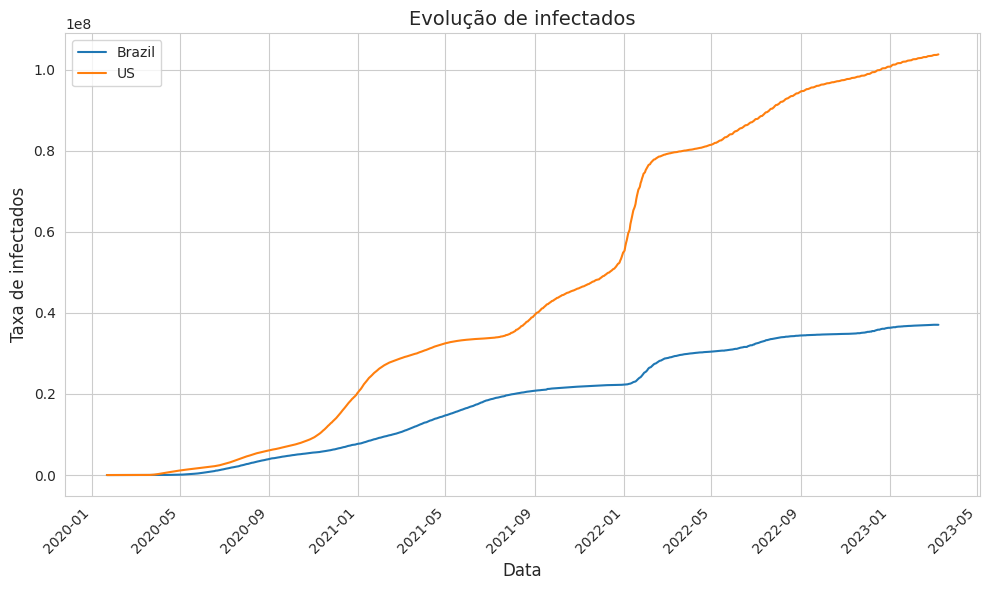

In [172]:
#1.Gráfico de linhas contendo a evolução do número de infectados do Brasil e Estados Unidos.
brazil_data = dados_covid.query("country == 'Brazil'").sort_values("date")
us_data = dados_covid.query("country == 'US'").sort_values("date")

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='infected', data=brazil_data, label="Brazil")
sns.lineplot(x='date', y='infected', data=us_data, label="US")

plt.xlabel("Data", fontsize=12)
plt.ylabel("Taxa de infectados", fontsize=12)
plt.title("Evolução de infectados", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

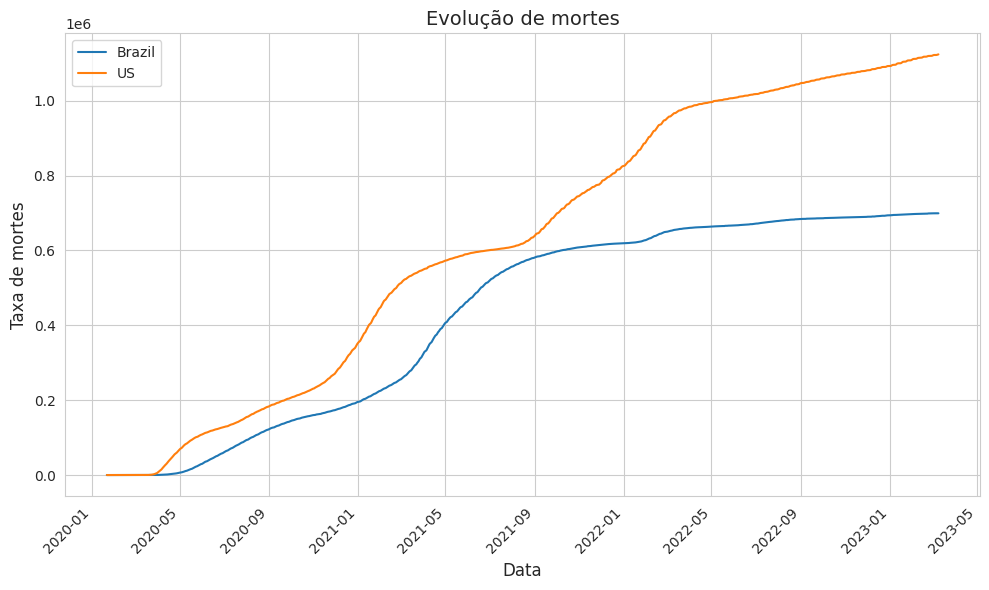

In [165]:
#2. Gráfico de linhas contendo a evolução do número de mortos do Brasil e Estados Unidos.
brazil_data = dados_covid.query("country == 'Brazil'").sort_values("date")
us_data = dados_covid.query("country == 'US'").sort_values("date")

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.lineplot(x='date', y='dead', data=brazil_data, label="Brazil")
ax = sns.lineplot(x='date', y='dead', data=us_data, label="US")

plt.xlabel("Data", fontsize=12)
plt.ylabel("Taxa de mortes", fontsize=12)
plt.title("Evolução de mortes", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

In [173]:
dados_covid

,province,country,Lat,Long,date,infected,dead
0,NaN,Afghanistan,33.939110,67.709953,2020-01-22,0,0
1,NaN,Albania,41.153300,20.168300,2020-01-22,0,0
2,NaN,Algeria,28.033900,1.659600,2020-01-22,0,0
3,NaN,Andorra,42.506300,1.521800,2020-01-22,0,0
4,NaN,Angola,-11.202700,17.873900,2020-01-22,0,0
...,...,...,...,...,...,...,...
330322,NaN,West Bank and Gaza,31.952200,35.233200,2023-03-09,703228,5708
330323,NaN,Winter Olympics 2022,39.904200,116.407400,2023-03-09,535,0
330324,NaN,Yemen,15.552727,48.516388,2023-03-09,11945,2159
330325,NaN,Zambia,-13.133897,27.849332,2023-03-09,343135,4057


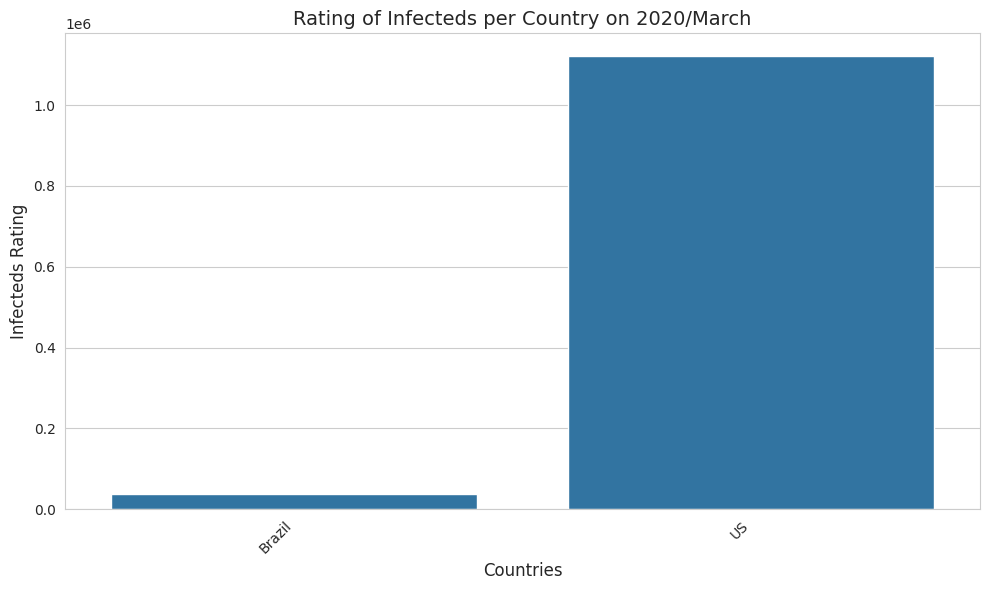

In [182]:
#3 Gráfico de barras comparando o número de infectados de Brasil e Estados Unidos em 20/mar
df = dados_covid.query("country in ['Brazil', 'US'] and date >= '2020-03-01' and date <= '2020-03-31'")
df_sum = df.groupby("country").agg(infecteds = pd.NamedAgg('infected', 'sum'))

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='infecteds', data=df_sum)

plt.xlabel("Countries", fontsize=12)
plt.ylabel("Infecteds Rating", fontsize=12)
plt.title("Rating of Infecteds per Country on 2020/March", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

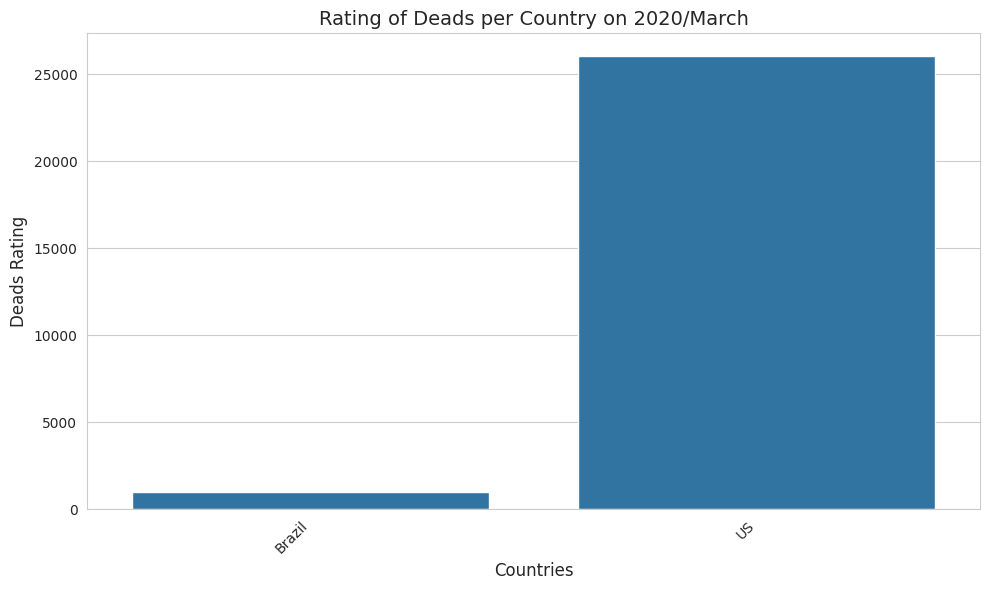

In [183]:
# 4. 	Gráfico de barras comparando o número de mortos de Brasil e Estados Unidos em 20/mar.
df = dados_covid.query("country in ['Brazil', 'US'] and date >= '2020-03-01' and date <= '2020-03-31'")
df_sum = df.groupby("country").agg(deads = pd.NamedAgg('dead', 'sum'))

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='deads', data=df_sum)

plt.xlabel("Countries", fontsize=12)
plt.ylabel("Deads Rating", fontsize=12)
plt.title("Rating of Deads per Country on 2020/March", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

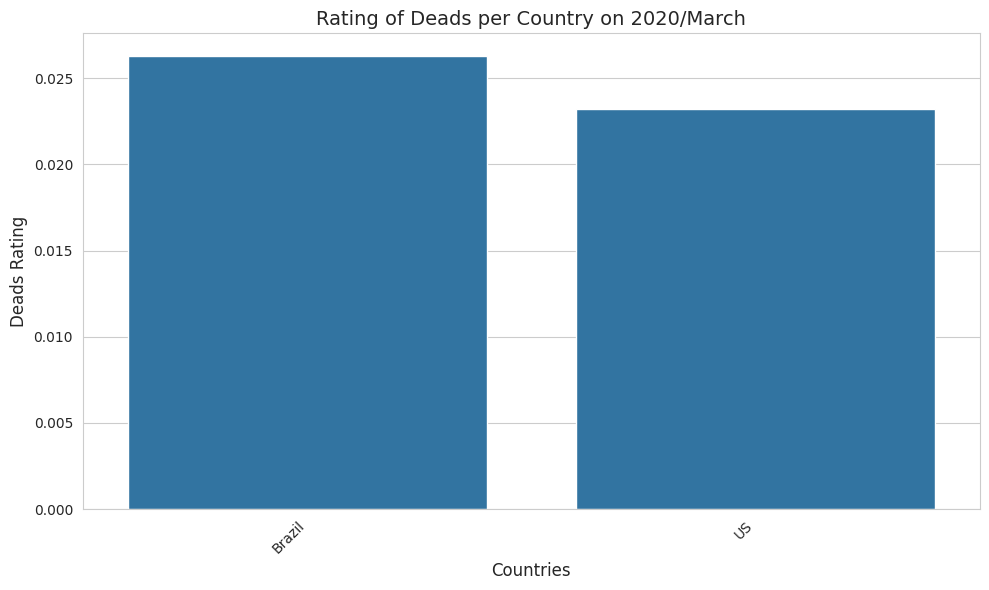

In [188]:
# 5. 	Gráfico de barras comparando a taxa de mortalidade de Brasil e Estados Unidos em 20/mar.
dados_covid_twenty_march = dados_covid.query("country in ['Brazil', 'US'] and date >= '2020-03-01' and date <= '2020-03-31'")
infecteds_deads_per_country = dados_covid_twenty_march.groupby("country").agg(infecteds = pd.NamedAgg('infected', 'sum'), deads = pd.NamedAgg('dead', 'sum'))
infecteds_deads_per_country['mortality'] = infecteds_deads_per_country["deads"] / infecteds_deads_per_country["infecteds"]


sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='country', y='mortality', data=infecteds_deads_per_country)

plt.xlabel("Countries", fontsize=12)
plt.ylabel("Deads Rating", fontsize=12)
plt.title("Rating of Deads per Country on 2020/March", fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()